In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
sc_zip_df = pd.read_csv("data/social_capital_zip.csv")

number of samples: 23028


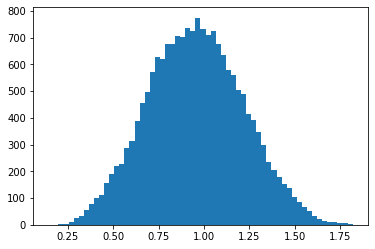

In [18]:
ec_grp_mem_zip = sc_zip_df[["ec_grp_mem_zip"]]
ec_grp_mem_zip = np.array(ec_grp_mem_zip.values).reshape(-1)
print(f"number of samples: {ec_grp_mem_zip.shape[0]}")
ec_grp_mem_zip = np.hstack(ec_grp_mem_zip)
plt.hist(ec_grp_mem_zip, bins='auto')
plt.show()


number of samples: 23028


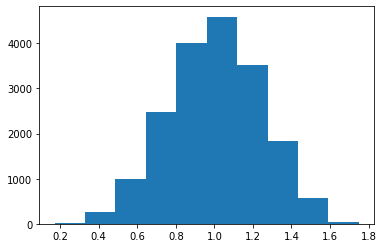

In [19]:
exposure_grp_mem_zip = sc_zip_df[["exposure_grp_mem_zip"]]
exposure_grp_mem_zip = np.array(exposure_grp_mem_zip.values).reshape(-1)
print(f"number of samples: {exposure_grp_mem_zip.shape[0]}")
exposure_grp_mem_zip = np.hstack(exposure_grp_mem_zip)
plt.hist(exposure_grp_mem_zip)
plt.show()

number of samples: 23028


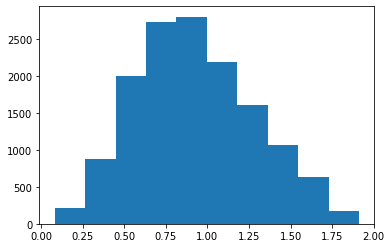

In [20]:
nbhd_exposure_zip = sc_zip_df[["nbhd_exposure_zip"]]
nbhd_exposure_zip = np.array(nbhd_exposure_zip.values).reshape(-1)
print(f"number of samples: {nbhd_exposure_zip.shape[0]}")
nbhd_exposure_zip = np.hstack(nbhd_exposure_zip)
plt.hist(nbhd_exposure_zip)
plt.show()